Riya & Austin<br/>Section 3

# Question

# Model

### Setting up the environment

In [92]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [115]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=360, Q=0, C=2, R=0, D=0)

,values
S,360
Q,0
C,2
R,0
D,0


In [116]:
'''
i: contagion rate
p: proportion quarantined
g: "go home" rate (a.k.a. C->Q rate)
alpha: quarantined recovery rate
beta: quarantined death rate
gamma: coming to class recovery rate
sigma: coming to class death rate
'''

system = System(
    i=2,
    p=0.4,
    g=0.3,
    alpha=0.4,
    beta=0.1,
    gamma=0.001,
    sigma=0.3
)

,values
i,2.000
p,0.400
g,0.300
alpha,0.400
beta,0.100
gamma,0.001
sigma,0.300


In [117]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C * delta, S])
    recoveries = min([Q*alpha + C*gamma, 80])
    deaths     = min([Q*beta + C*sigma, 80])
    
    
    dSdt = -infections * dt
    dQdt = (infections * p + C*g - Q*alpha - Q*beta) * dt
    dCdt = (infections * (1-p) - C*gamma - C*sigma - C*g) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [118]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [119]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

          S            Q            C         R        D
0       360            0            2         0        0
1       356          2.2        3.198     0.002      0.6
2   349.604       4.6178       5.1136  0.885198   1.7794
3   339.377      7.93386      8.17665   2.73743  3.77526
4   323.023      12.9612      13.0745   5.91915  7.02164
5   296.875      20.8625      20.9061   11.1167  12.2401
6   255.062      33.4279      33.4288   19.4826  20.5982
7   188.205      53.4856      53.4527   32.8872  33.9696
8   81.2995      85.5407      85.4708    54.335   55.354
9         0      100.931      82.8826   88.6367  89.5493
10        0      75.3305      33.0701   129.092  124.507
11        0      47.5863       13.195   159.257  141.961
12        0      27.7516       5.2648   178.305  150.678
13        0      15.4553      2.10066   189.411  155.033
14        0      8.35783     0.838161   195.595  157.209
15        0      4.43036     0.334426   198.939  158.296
16        0      2.31551     0.

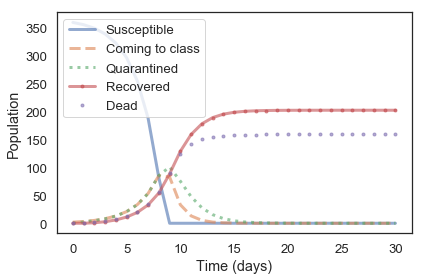

In [120]:
results = run_simulation(system, init, 30, 1)
plot_results(results)
print(results)

# Results

In [ ]:
"""
peeps amount don't matter
"""

# Interpretation